# 数据规整（复杂）

*  上周主要内容：数据规整（复杂）
*  本周主要内容：分进合击（二维复杂）

-----
我們不僅知道数据规整手段重要，数据样态(及其目的)更重要，也迫不及得策劃項目了。

讓我們來挑戰分进合击（二维复杂），以有意義的方式來整合不同數據

-----

##  介绍

### 上3周主要内容：
1. 分进合击（一维复杂）
2. 数据规整（复杂）--区分 报表 vs. 数据库 的数据样态
3. 数据項目策劃


### 本周主要内容：分进合击（二维复杂）
![宽至长使用melt](https://pandas.pydata.org/pandas-docs/stable/_images/07_melt1.svg#thumbnail)
1. <mark>数据样态的重要性</mark>：
  * 原分析单元：独角兽
  * 目标分析单元：湾区丶行业
  * 中介變量：国家丶城市
  * 整合數据源：
    * 新增湾区
    * 結合（中國）国家數據庫的行业？
2. 进行数据规整：
  * <mark>机器化（代码取用方便，较长）</mark> records, stacked (右图上)
  * <mark>报表化（人类视解理解方便，较寛）</mark> (右图下)
![长至宽使用pivot](https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot.svg#thumbnail)


### 本电子讲义说明

本电子讲义为一系列课程的主要教材
* 课程：
  * 20春_数据分析pandas （中山大学南方学院）
* 电子讲义设计者：廖汉腾, 许智超
* 参考来源: [官方英文新手教程](https://pandas.pydata.org/pandas-docs/version/1.0.2/getting_started/index.html#getting-started)
* 数据来源：[分省国家数据](http://data.stats.gov.cn/easyquery.htm?cn=E0103)

-----


课堂教学方式：
* 分段式以英文新手教程的内容做示范及说明
* 课堂上以实际中文数据做操练，每段约10-15分钟
* 抽学生联mic自播说明难点及成果点，教师总结

-----

课后实践方式：
* 学生fork教师提供的代码，做以下实践
* (必做)一项为此代码的实践，学生需要对ipynb文档中的说明(含markdown及图片)及代码进行演化改进，可以是注解说明，可以是调整参数实验，可以是额外方法实践，可以是以上的组合，学生
* (选做)一项为此代码的延伸实践，学生对ipynb文档中的一部分或全部进行演化，变成另一个独立项目，说好或做好一件事


In [2]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 3.6rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 60%;
    height: auto;
    float: right;
}

.rendered_html img[src*="#full"], .rendered_html svg[src*="#full"] {
    max-width: 100%;
    height: auto;
    float: none;
}

.rendered_html img[src*="#thumbnail"], .rendered_html svg[src*="#thumbnail"] {
    max-width: 35%;
    height: auto;
}
.rendered_html img[src*="#thumbnailauto"], .rendered_html svg[src*="#thumbnail"] {
    max-width: auto;
    height: auto;
}

/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}
.bg-reshape {
    width: 550px;
    height: 205px;
    background: url('../20春_pandas_CheatSheet.svg') -205px -110px;
}
.break {
                   page-break-after: right; 
                   width:100%;
                   clear:both;
}
</style>

In [1]:
import pandas as pd
import json

## 本周内容纲要

# 区分 报表 vs. 数据库 的数据样态
## A 产出数据(上周)
上周内容就是从数据库 的数据样态往报表的典型过程
* df_raw  908300 rows × 1 columns
* df_就业切片 11780 rows × 6 columns

### A-0 数据准备 
数据库的数据样态

In [2]:
# A-0 
df = pd.read_csv ("20春_pandas_week02_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
#df.info() # 注意看Dtype! 
#print (df.nunique())
# 简化栏位变数名称
df.columns = [x.replace(' Name','').replace('（亿人民币）','').replace('掌门人/','')  for x in df.columns]
独角兽=df.copy()
独角兽.head()

,排名,企业名称,Company,估值,国家,城市,行业,创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


### A-1 数据拆分成新表
数据库的数据样态

In [3]:
独角兽_创始人 = 独角兽.set_index("企业名称")[['创始人']].copy()
独角兽_创始人['创始人'] = [x.replace("、",",").replace(", ",",").split(",") for x in 独角兽.创始人]
独角兽_创始人.创始人.apply(pd.Series)\
            .reset_index()\
            .melt(id_vars='企业名称', value_name='创始人')\
            .drop("variable", axis = 1)\
            .dropna()\
            .reset_index(drop=True)

,企业名称,创始人
0,蚂蚁金服,井贤栋
1,字节跳动,张一鸣
2,滴滴出行,程维
3,Infor,Jim Schaper
4,JUUL Labs,Adam Bowen
...,...,...
910,ironSource,Tomer Bar Zeev
911,Lazada,Oliver Samwer
912,Lazada,Stefan Bruun
913,Lazada,Stein Jakob Oeie


In [11]:
#            .dropna().dropna(NA=" ")\
独角兽_投资机构 = 独角兽.set_index("企业名称")[['部分投资机构']].copy()
独角兽_投资机构['部分投资机构'] = [x.replace("、",",").replace(", ",",").split(",") for x in 独角兽.部分投资机构]
独_投 = 独角兽_投资机构.部分投资机构.apply(pd.Series)\
            .reset_index()\
            .melt(id_vars='企业名称', value_name='部分投资机构')\
            .drop("variable", axis = 1)\
            .dropna()\
            .reset_index(drop=True)
独_投

,企业名称,部分投资机构
0,蚂蚁金服,春华资本
1,字节跳动,红杉资本
2,滴滴出行,腾讯
3,Infor,Golden Gate Capital
4,JUUL Labs,M13
...,...,...
1830,Ola Cabs,Steadview Capital
1831,Grab,Bookings Holdings
1832,Ola Cabs,Tencent Holdings
1833,Grab,


In [14]:
独_投.set_index("企业名称").loc['Grab']

,部分投资机构
企业名称,
Grab,Vertex Ventures
Grab,GGV Capital
Grab,Rheingau Founders
Grab,SoftBank
Grab,SoftBank Capital
Grab,Tiger Global Management
Grab,Didi Chuxing
Grab,HSBC
Grab,Emtek Group


In [15]:
独角兽top = 独_投.groupby("企业名称").count().sort_values(by="部分投资机构", ascending=False)

In [16]:
投资机构top = 独_投.groupby("部分投资机构").count().sort_values(by="企业名称", ascending=False)

In [17]:
独_投.set_index("部分投资机构").loc[投资机构top[0:10].index].reset_index()
独_投[独_投.部分投资机构.isin(['红杉资本', '腾讯', 'Tiger Global Management'])]

,企业名称,部分投资机构
1,字节跳动,红杉资本
2,滴滴出行,腾讯
5,爱彼迎,Tiger Global Management
10,微众银行,腾讯
12,京东数科,红杉资本
...,...,...
1662,Grab,Tiger Global Management
1686,博纳影业,腾讯
1693,Toast,Tiger Global Management
1712,Actifio,Tiger Global Management


In [18]:
target = 独_投.set_index("部分投资机构").loc[投资机构top[0:10].index].reset_index()
投l = list(target.部分投资机构.unique())[0:5]
投l

['红杉资本', '腾讯', 'Tiger Global Management', 'IDG', 'Sequoia Capital']

In [19]:
t = target.groupby("企业名称").count().sort_values(by="部分投资机构", ascending=False)
企l = list(t[t.部分投资机构>=2].index)
print (企l)
#display(t)

['Rappi', 'Discord', 'Instacart', '罗辑思维', '微医', 'Grab', '知乎', '小红书', '自如', 'Illumio', 'Improbable', 'InVision', 'Sumo Logic', 'Stripe', 'Squarespace', '空中云汇', '百融金服', 'TransferWise', '猿辅导', 'SheIn', '优必选', '爱彼迎', 'Nubank', '滴滴出行', '满帮', '水滴', '比特大陆', '每日优鲜', '快手', 'Roblox', '找钢网', '斗鱼', 'Glossier', '挖财', 'BlaBlaCar', '大疆', 'Coinbase', '途虎养车', '京东物流', '雾芯科技', 'Confluent', 'Coupang', 'Bird Rides', '博纳影业', '车好多', '同盾科技', '妙手医生', 'Aurora', 'VIPKID', '企鹅杏仁', '字节跳动', 'UiPath', 'Actifio', 'Freshworks']


In [20]:
target = 独_投[独_投.部分投资机构.isin(投l)]
target = target[target.企业名称.isin(企l)].sort_values(by="部分投资机构")
target

,企业名称,部分投资机构
1293,挖财,IDG
722,SheIn,IDG
1269,水滴,IDG
513,比特大陆,IDG
1438,百融金服,IDG
...,...,...
965,京东物流,腾讯
1315,快手,腾讯
439,水滴,腾讯
43,满帮,腾讯


In [21]:
import networkx as nx
G = nx.from_pandas_edgelist(target, '部分投资机构', '企业名称',  create_using=nx.DiGraph)
pos = nx.bipartite_layout(G, nodes=list(target.部分投资机构.unique()))

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25366 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36130 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-pack

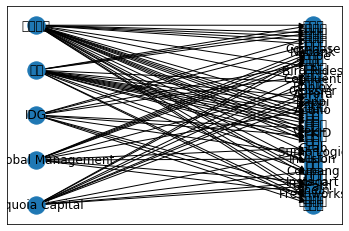

In [22]:
nx.draw_networkx(G, pos, arrows=True, with_labels=True)

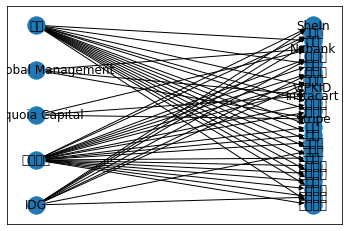

In [348]:

pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=2.3)
pos = nx.spectral_layout(G)
pos = nx.spiral_layout(G)
pos = nx.bipartite_layout(G, nodes=list(target.部分投资机构.unique()))
nx.draw_networkx(G, pos, arrows=True, with_labels=True)


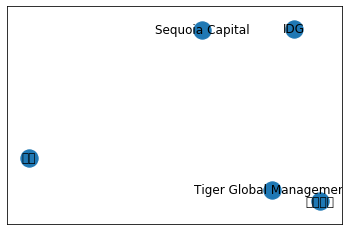

In [208]:
# https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html?highlight=mode
from networkx.algorithms import bipartite
bipartite.is_bipartite(G)
co = bipartite.collaboration_weighted_projected_graph(G, nodes= list(target.部分投资机构.unique()))
nx.draw_networkx(co, pos, arrows=True, with_labels=True)

In [304]:
allnodes = list(target.melt().value.unique())

In [309]:
dict_企投 = target.groupby("企业名称").agg(list).to_dict()['部分投资机构']
dict_企投 = {k:", ".join(dict_企投[k]) if k in dict_企投.keys() else "本身是投资机构" for k in allnodes}
dict_企投

{'猿辅导': 'IDG, 腾讯',
 '水滴': 'IDG, 腾讯',
 '百融金服': 'IDG, 红杉资本',
 '比特大陆': 'IDG, 红杉资本',
 '车好多': 'IDG, 红杉资本',
 'SheIn': 'IDG, 红杉资本',
 '找钢网': 'IDG, 红杉资本',
 '雾芯科技': 'IDG, 红杉资本',
 'Instacart': 'Sequoia Capital, Tiger Global Management',
 'Stripe': 'Sequoia Capital, Tiger Global Management',
 'Nubank': 'Sequoia Capital, Tiger Global Management',
 '空中云汇': '红杉资本, 腾讯',
 '滴滴出行': '红杉资本, 腾讯',
 '企鹅杏仁': '红杉资本, 腾讯',
 'VIPKID': '红杉资本, 腾讯',
 '自如': '红杉资本, 腾讯',
 '京东物流': '红杉资本, 腾讯',
 '罗辑思维': '红杉资本, 腾讯',
 '小红书': '红杉资本, 腾讯',
 '斗鱼': '红杉资本, 腾讯',
 '博纳影业': '红杉资本, 腾讯',
 '微医': '红杉资本, 腾讯',
 '快手': '红杉资本, 腾讯',
 '满帮': '红杉资本, 腾讯',
 'IDG': '本身是投资机构',
 'Sequoia Capital': '本身是投资机构',
 'Tiger Global Management': '本身是投资机构',
 '红杉资本': '本身是投资机构',
 '腾讯': '本身是投资机构'}

In [334]:
dict_投企 = target.groupby("部分投资机构").agg(list).to_dict()['企业名称']
node_colors = {k:"red" if k in dict_投企.keys() else "blue" for k in allnodes}
dict_投企 = {k:", ".join(dict_投企[k]) if k in dict_投企.keys() else "本身是独角兽" for k in allnodes}
dict_投企.keys()

dict_keys(['猿辅导', '水滴', '百融金服', '比特大陆', '车好多', 'SheIn', '找钢网', '雾芯科技', 'Instacart', 'Stripe', 'Nubank', '空中云汇', '滴滴出行', '企鹅杏仁', 'VIPKID', '自如', '京东物流', '罗辑思维', '小红书', '斗鱼', '博纳影业', '微医', '快手', '满帮', 'IDG', 'Sequoia Capital', 'Tiger Global Management', '红杉资本', '腾讯'])

In [335]:
nx.set_node_attributes(G, dict_企投, 'VC')
nx.set_node_attributes(G, dict_投企, 'unicorn')
nx.set_node_attributes(G, node_colors, "node_color")

In [336]:
G.nodes['IDG']

{'unicorn': '猿辅导, 水滴, 百融金服, 比特大陆, 车好多, SheIn, 找钢网, 雾芯科技',
 'VC': '本身是投资机构',
 'node_color': 'red'}

In [337]:
G.nodes['猿辅导']

{'VC': 'IDG, 腾讯', 'unicorn': '本身是独角兽', 'node_color': 'blue'}

In [349]:
N = len(list(G.nodes))
node_indices = list(range(N))

import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# Show with Bokeh
plot = Plot(plot_width=1000, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("名", "@index"), ("投资机构", "@VC"), ("投资的独角兽", "@unicorn")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

#graph_renderer = from_networkx(G, nx.fruchterman_reingold_layout, scale=1, center=(0, 0))
graph_renderer = from_networkx(G, pos, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="node_color")
#graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [273]:
G.nodes['IDG']["投资的独角兽"]#['蚂蚁金服']


'猿辅导, 水滴, 百融金服, 比特大陆, 车好多, SheIn, 找钢网, 雾芯科技'

In [274]:
pos

{'IDG': array([ 0.07997509, -0.09039852]),
 '猿辅导': array([ 0.11756109, -0.07667856]),
 '水滴': array([ 0.14118052, -0.0388459 ]),
 '百融金服': array([0.13970123, 0.01372298]),
 '比特大陆': array([0.10717786, 0.06731996]),
 '车好多': array([0.04431536, 0.10645674]),
 'SheIn': array([-0.04122373,  0.11683286]),
 '找钢网': array([-0.1357533 ,  0.08822829]),
 '雾芯科技': array([-0.22162503,  0.01682932]),
 'Sequoia Capital': array([-0.28011842, -0.09342603]),
 'Instacart': array([-0.29471812, -0.23075322]),
 'Stripe': array([-0.2542591 , -0.37675806]),
 'Nubank': array([-0.15541955, -0.50887835]),
 'Tiger Global Management': array([-0.00412135, -0.60370876]),
 '红杉资本': array([ 0.18445284, -0.64073434]),
 '空中云汇': array([ 0.38731704, -0.6059113 ]),
 '滴滴出行': array([ 0.57648372, -0.49452839]),
 '企鹅杏仁': array([ 0.72276836, -0.31286142]),
 'VIPKID': array([ 0.80008574, -0.07828894]),
 '自如': array([0.78962503, 0.18225124]),
 '京东物流': array([0.68327487, 0.43534585]),
 '罗辑思维': array([0.48574418, 0.64537857]),
 '小红书': ar

In [271]:
G.nodes[0].index

KeyError: 0

In [3]:
# A-0 国家数据库分省数据准备
df_raw = pd.read_csv("fsnd_zb_data.tsv", encoding='utf8', sep='\t', \
                 keep_default_na=False, na_values ='na_rep', 
                 index_col = [0,1,2] )   # 第0, 1, 2 为索引
df_m = pd.read_csv("fsnd_zb_meta.tsv",encoding='utf8', sep='\t',  keep_default_na=False, na_values ='na_rep', index_col =0)
df_r = pd.read_csv("reg_treeId_level2.tsv",encoding='utf8', sep='\t',  keep_default_na=False, na_values ='na_rep', index_col =0)
print (df_raw.shape)
display(df_raw)

(908300, 1)


data
zb      reg    sj             
A010101 110000 2018        NaN
               2017        NaN
               2016        NaN
               2015        NaN
               2014        NaN
...                        ...
A0S0B05 650000 2013  33.856600
               2012  24.914044
               2011        NaN
               2010        NaN
               2009        NaN

[908300 rows x 1 columns]

### A-1 字典准备
* 元数据"meta" 在数据科学或在信息管理的意思是什麽？
* 元数据"meta" 在国家数据库的分省年度数据指的是＂指标＂（zb)元数据，关於数据的数据

In [4]:
# A-1  创建指标字典
import pprint
指标字典 = df_m['cname'].to_dict()
地区字典 = df_r.set_index("id")['name'].to_dict()
pprint.pprint(指标字典)
pprint.pprint(地区字典)

{'A010101': '地级区划数',
 'A010102': '地级市数',
 'A010103': '县级区划数',
 'A010104': '市辖区数',
 'A010105': '县级市数',
 'A010106': '县数',
 'A010107': '自治县数',
 'A010108': '乡镇级区划数',
 'A010109': '镇数',
 'A01010A': '乡数',
 'A01010B': '街道办事处',
 'A010201': '三次产业法人单位数',
 'A010202': '分机构类型法人单位数',
 'A010203': '分行业法人单位数',
 'A010301': '按控股情况分企业法人单位数',
 'A010302': '按登记注册类型分企业法人单位数',
 'A020101': '地区生产总值',
 'A020102': '第一产业增加值',
 'A020103': '第二产业增加值',
 'A020104': '第三产业增加值',
 'A020105': '农林牧渔业增加值',
 'A020106': '工业增加值',
 'A020107': '建筑业增加值',
 'A020108': '批发和零售业增加值',
 'A020109': '批发和零售贸易餐饮业增加值',
 'A02010A': '交通运输、仓储和邮政业增加值',
 'A02010B': '交通运输、仓储和邮电通信业增加值',
 'A02010C': '住宿和餐饮业增加值',
 'A02010D': '金融业增加值',
 'A02010E': '房地产业增加值',
 'A02010F': '其他行业增加值',
 'A02010G': '人均地区生产总值',
 'A020201': '地区生产总值指数(上年=100)',
 'A020202': '第一产业增加值指数(上年=100)',
 'A020203': '第二产业增加值指数(上年=100)',
 'A020204': '第三产业增加值指数(上年=100)',
 'A020301': '收入法生产总值',
 'A020302': '劳动者报酬',
 'A020303': '生产税净额',
 'A020304': '固定资产折旧',
 'A020305': '营业盈余',
 'A020401': '支出法生

 'A0B0902': '生活垃圾清运量',
 'A0B0903': '粪便清运量',
 'A0B0904': '市容环卫专用车辆设备',
 'A0B0905': '公共厕所数量',
 'A0B0906': '三类以上公共厕所数量',
 'A0B0A01': '城市用水普及率',
 'A0B0A02': '城市燃气普及率',
 'A0B0A03': '每万人拥有公共交通车辆',
 'A0B0A04': '人均城市道路面积',
 'A0B0A05': '人均公园绿地面积',
 'A0B0A06': '每万人拥有公共厕所',
 'A0C0101': '石油储量',
 'A0C0102': '天然气储量',
 'A0C0103': '煤炭储量',
 'A0C0104': '铁矿储量',
 'A0C0105': '锰矿储量',
 'A0C0106': '铬矿储量',
 'A0C0107': '钒矿储量',
 'A0C0108': '原生钛铁矿储量',
 'A0C0201': '铜矿储量',
 'A0C0202': '铅矿储量',
 'A0C0203': '锌矿储量',
 'A0C0204': '铝土矿储量',
 'A0C0205': '菱镁矿储量',
 'A0C0206': '硫铁矿储量',
 'A0C0207': '磷矿储量',
 'A0C0208': '高岭土储量',
 'A0C0301': '水资源总量',
 'A0C0302': '地表水资源量',
 'A0C0303': '地下水资源量',
 'A0C0304': '地表水与地下水资源重复量',
 'A0C0305': '人均水资源量',
 'A0C0401': '供水总量',
 'A0C0402': '地表水供水总量',
 'A0C0403': '地下水供水总量',
 'A0C0404': '其他供水总量',
 'A0C0405': '用水总量',
 'A0C0406': '农业用水总量',
 'A0C0407': '工业用水总量',
 'A0C0408': '生活用水总量',
 'A0C0409': '生态用水总量',
 'A0C040A': '人均用水量',
 'A0C0501': '废水排放总量',
 'A0C0502': '化学需氧量排放量',
 'A0C0503': '氨氮排放量',
 'A0C0504

 'A0F0E02': '建筑业企业上年结转合同额',
 'A0F0E03': '建筑业企业本年新签合同额',
 'A0F0E04': '建筑业企业直接从建设单位承揽工程完成的产值',
 'A0F0E05': '建筑业企业自行完成施工产值',
 'A0F0E06': '建筑业企业分包出去工程的产值',
 'A0F0E07': '建筑业企业从建设单位以外承揽工程完成的产值',
 'A0F0F01': '建筑业企业实收资本',
 'A0F0F02': '内资建筑业企业实收资本',
 'A0F0F03': '国有建筑业企业实收资本',
 'A0F0F04': '集体建筑业企业实收资本',
 'A0F0F05': '港澳台商投资建筑业企业实收资本',
 'A0F0F06': '港澳台商独资建筑业企业实收资本',
 'A0F0F07': '外商投资建筑业企业实收资本',
 'A0F0F08': '外商独资建筑业企业实收资本',
 'A0F0G01': '资产合计',
 'A0F0G02': '流动资产',
 'A0F0G03': '固定资产',
 'A0F0G04': '无形及递延资产',
 'A0F0H01': '建筑业企业资产',
 'A0F0H02': '内资建筑业企业资产',
 'A0F0H03': '国有建筑业企业资产',
 'A0F0H04': '集体建筑业企业资产',
 'A0F0H05': '港澳台商投资建筑业企业资产',
 'A0F0H06': '港澳台商独资建筑业企业资产',
 'A0F0H07': '外商投资建筑业企业资产',
 'A0F0H08': '外商独资建筑业企业资产',
 'A0F0I01': '负债合计',
 'A0F0I02': '流动负债',
 'A0F0I03': '长期负债',
 'A0F0I04': '所有者权益',
 'A0F0J01': '建筑业企业所有者权益',
 'A0F0J02': '内资建筑业企业所有者权益',
 'A0F0J03': '国有建筑业企业所有者权益',
 'A0F0J04': '集体建筑业企业所有者权益',
 'A0F0J05': '港澳台商投资建筑业企业所有者权益',
 'A0F0J06': '港澳台商独资建筑业企业所有者权益',
 'A0F0J07': '外商投资建筑业企业所有者权益',
 'A0F0J

 'A0S0304': '基本养老保险基金收入',
 'A0S0305': '基本养老保险基金支出',
 'A0S0306': '基本养老保险累计结余',
 'A0S0401': '参加失业保险人数',
 'A0S0402': '年末领取失业保险金人数',
 'A0S0403': '失业保险基金收入',
 'A0S0404': '失业保险基金支出',
 'A0S0405': '失业保险累计结余',
 'A0S0501': '城镇基本医疗保险年末参保人数',
 'A0S0502': '城镇职工基本医疗保险年末参保人数',
 'A0S0503': '城镇在岗职工基本医疗保险年末参保人数',
 'A0S0504': '城镇退休人员基本医疗保险年末参保人数',
 'A0S0505': '城镇居民基本医疗保险年末参保人数',
 'A0S0506': '城镇基本医疗保险基金收入',
 'A0S0507': '城镇职工医疗保险基金收入',
 'A0S0508': '城镇居民医疗保险基金收入',
 'A0S0509': '城镇基本医疗保险基金支出',
 'A0S050A': '城镇职工医疗保险基金支出',
 'A0S050B': '城镇居民医疗保险基金支出',
 'A0S050C': '城镇基本医疗保险基金累计结余',
 'A0S050D': '城镇职工医疗保险基金累计结余',
 'A0S050E': '城镇居民医疗保险基金累计结余',
 'A0S0601': '工伤保险年末参保人数',
 'A0S0602': '享受工伤待遇的人数',
 'A0S060C': '工伤保险基金收入',
 'A0S060D': '工伤保险基金支出',
 'A0S060E': '工伤保险累计结余',
 'A0S0701': '年末参加生育保险人数',
 'A0S0702': '享受生育保险待遇人数',
 'A0S0703': '生育保险基金收入',
 'A0S0704': '生育保险基金支出',
 'A0S0705': '生育保险累计结余',
 'A0S0801': '新型农村社会养老保险试点参保人数',
 'A0S0802': '新型农村社会养老保险试点达到领取待遇年龄参保人数',
 'A0S0803': '新型农村社会养老保险试点基金收入',
 'A0S0804': '新型农村社会养老保险试点基金支

### A-2 代码->人读数据(复习)
使用字典进行数据框转换：给人看？

In [5]:
# A-2
df_raw.reset_index().set_index("zb").rename(index=指标字典)
df = df_raw.reset_index().set_index("zb").rename(index=指标字典)
df = df.reset_index().set_index("reg").rename(index=地区字典)
df_zh = df.reset_index().rename(columns={"zb":"指标","reg":"地区",\
                                         "sj":"年","data":"数据",})
df_zh.head()

,地区,指标,年,数据
0,北京市,地级区划数,2018,NaN
1,北京市,地级区划数,2017,NaN
2,北京市,地级区划数,2016,NaN
3,北京市,地级区划数,2015,NaN
4,北京市,地级区划数,2014,NaN


### A-3 筛选数据为目标数据

* 筛选指标：城镇就业单位、人员平均工资、人员  
* 过滤出目标数据
   * 方法和逻辑：pandas 字符串的操作、切片、列表推导
     

In [6]:
# A-3 城镇就业单位、人员平均工资、人员
dslice = df_zh [ df_zh.指标.str.contains("城镇单位就业人员") ]
# 指标分的可能性 = dslice.指标.unique()
指标分的可能性 = [ x.split("城镇单位就业") for x in dslice.指标.unique()] 
指标分的可能性_取 = [ [x,y] for (x,y) in 指标分的可能性 if (y=='人员平均工资' or y=='人员') and x!='']
指标分的可能性 = [ x.split("城镇单位就业") for x in dslice.指标.unique()] 
指标分的可能性_取_all = ["城镇单位就业".join(x) for x in 指标分的可能性_取]
df_就业切片 = df_zh.set_index("指标").loc[指标分的可能性_取_all].reset_index()
df_就业切片['行业'] = [x.split("城镇单位就业")[0] for x in df_就业切片.指标]
df_就业切片['行业指标'] = [x.split("城镇单位就业")[1] for x in df_就业切片.指标]
df_就业切片 = df_就业切片[ [x for x  in df_就业切片.columns if x !='数据'] + ['数据'] ]
df_就业切片

,指标,地区,年,行业,行业指标,数据
0,农林牧渔业城镇单位就业人员,北京市,2018,农林牧渔业,人员,NaN
1,农林牧渔业城镇单位就业人员,北京市,2017,农林牧渔业,人员,3.4116
2,农林牧渔业城镇单位就业人员,北京市,2016,农林牧渔业,人员,3.6867
3,农林牧渔业城镇单位就业人员,北京市,2015,农林牧渔业,人员,3.8949
4,农林牧渔业城镇单位就业人员,北京市,2014,农林牧渔业,人员,3.2331
...,...,...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,公共管理和社会组织,人员平均工资,46636.0000
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,公共管理和社会组织,人员平均工资,45071.0000
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,公共管理和社会组织,人员平均工资,39862.0000
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,公共管理和社会组织,人员平均工资,35950.0000


# set_index unstack 出报表

## B-0 两指标出报表含原数据样态
按两指标进行，并把重覆信息栏位 ["指标","行业指标"] 使用drop移除

In [7]:
# B-0 两指标出报表含原数据样态
print (list(df_就业切片.行业指标.unique()))
报表 = dict()

报表['人员平均工资_原'] = df_就业切片.query("行业指标=='人员平均工资'")\
                                   .drop(["指标","行业指标"], axis=1)
报表['人员_原'] =        df_就业切片.query("行业指标=='人员'")\
                                   .drop(["指标","行业指标"], axis=1)
报表['人员平均工资'] =  报表['人员平均工资_原'].set_index(['地区','年','行业']).unstack(1)
报表['人员'] =  报表['人员_原'].set_index(['地区','年','行业']).unstack(1)

# 输出至EXCEL
with pd.ExcelWriter("报表_原.xlsx") as writer:   
    for sheet_name in sorted(报表.keys()):
        报表[sheet_name].to_excel(writer,sheet_name=sheet_name) 
        print (sheet_name, 报表[sheet_name].shape)
        
原 = 报表['人员平均工资_原']
报 = 报表['人员平均工资']
原.index.name = '人员平均工资'
报.index.name = '人员平均工资'


['人员', '人员平均工资']
人员 (589, 10)
人员_原 (5890, 4)
人员平均工资 (589, 10)
人员平均工资_原 (5890, 4)


## B-1 比较数据样态
* 心法：原和報的索引差異
* 劍法：.index .columns 

In [8]:
# B-1 比较数据样态
# 原: index 数字序列, column 地区	年	行业	数据
# 报: index 地区	行业, column 数据	年
print ("原.index", 原.index, "\n", "原.columns", 原.columns) 
print ("报索/行:", 报.index, "\n", "报索/栏/变:", 报.columns)
display (原)
display (报)

原.index Int64Index([ 5890,  5891,  5892,  5893,  5894,  5895,  5896,  5897,  5898,
             5899,
            ...
            11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778,
            11779],
           dtype='int64', name='人员平均工资', length=5890) 
 原.columns Index(['地区', '年', '行业', '数据'], dtype='object')
报索/行: MultiIndex([( '上海市',     '交通运输、仓储和邮政业'),
            ( '上海市',          '住宿和餐饮业'),
            ( '上海市',  '信息传输、计算机服务和软件业'),
            ( '上海市',       '公共管理和社会组织'),
            ( '上海市',        '农、林、牧、渔业'),
            ( '上海市',             '制造业'),
            ( '上海市',   '卫生、社会保障和社会福利业'),
            ( '上海市',      '居民服务和其他服务业'),
            ( '上海市',             '建筑业'),
            ( '上海市',            '房地产业'),
            ...
            ('黑龙江省',            '房地产业'),
            ('黑龙江省',          '批发和零售业'),
            ('黑龙江省',              '教育'),
            ('黑龙江省',       '文化、体育和娱乐业'),
            ('黑龙江省',   '水利、环境和公共设施管理业'),
            ('黑龙江省',  '电力、燃气及水的生产和供应业

,地区,年,行业,数据
人员平均工资,,,,
5890,北京市,2018,农、林、牧、渔业,NaN
5891,北京市,2017,农、林、牧、渔业,55218.0
5892,北京市,2016,农、林、牧、渔业,51941.0
5893,北京市,2015,农、林、牧、渔业,50797.0
5894,北京市,2014,农、林、牧、渔业,49478.0
...,...,...,...,...
11775,新疆维吾尔自治区,2013,公共管理和社会组织,46636.0
11776,新疆维吾尔自治区,2012,公共管理和社会组织,45071.0
11777,新疆维吾尔自治区,2011,公共管理和社会组织,39862.0


数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

## B-2 分解B-1步骤
三要点：
* A. 先.set_index() 后.unstack()，.unstack()预设是索引最后一个，**level**参数默认为-1.
* B. .shape 注意长v宽
* C. 先观察原始和报表的index 及 column （.index .columns 索引复杂度），注意上色后的EXCEL档做为参考

<mark>报表的索引复杂，数据库的索引简单</mark>

### 原: index 数字序列, column 地区	年	行业	数据
### 报: index 地区	行业, column 数据	年
![](reshaping_unstack.png)


In [9]:
# B-2-1 unstack() 
#原.set_index(["地区","行业"])    # (1)思考：地区	行业 --> index
原.set_index(["地区","行业","年"])\
  .unstack()  # (2)思考：地区	行业 	年 --> index  
              # 栏位索引的, 先做成行索引, 再unstack, 宽化的对象预设是索引最后一个             

数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [10]:
# B-2-2 unstack(0) 
原.set_index(["地区","行业","年"])\
  .unstack(0)  # (2)思考：地区	行业 	年 --> index  
              # 栏位索引的, 先做成行索引, 再unstack, 宽化的对象预设是索引最后一个             

数据                                                 \
地区                     上海市       云南省   内蒙古自治区       北京市      吉林省      四川省   
行业          年                                                               
交通运输、仓储和邮政业 2009   49847.0   31714.0  34578.0   46087.0  26539.0  31675.0   
            2010   58405.0   35897.0  39991.0   51342.0  30422.0  36496.0   
            2011   65455.0   44111.0  47775.0   59540.0  38722.0  43533.0   
            2012   71062.0   50069.0  53487.0   65986.0  45290.0  53841.0   
            2013   77999.0   53775.0  57041.0   72006.0  48587.0  58276.0   
...                    ...       ...      ...       ...      ...      ...   
金融业         2014  195718.0  110235.0  73866.0  225482.0  71894.0  84601.0   
            2015  208658.0  118166.0  76093.0  248320.0  75102.0  86084.0   
            2016  226500.0  121529.0  78570.0  239085.0  81958.0  87119.0   
            2017  247568.0  130774.0  81065.0  253637.0  87154.0  91529.0   
            2018       NaN       NaN      NaN       NaN      NaN      NaN   

                                                       ...                    \
地区                     天津市  宁夏回族自治区      安徽省      山东省  ...      湖南省      甘肃省   
行业          年                                          ...                     
交通运输、仓储和邮政业 2009   48453.0  32226.0  25098.0  34477.0  ...  28722.0  30916.0   
            2010   55912.0  36498.0  29408.0  39435.0  ...  32921.0  30928.0   
            2011   64805.0  40967.0  36103.0  46016.0  ...  39267.0  37272.0   
            2012   75420.0  50730.0  42787.0  50097.0  ...  45477.0  43603.0   
            2013   82315.0  54726.0  47235.0  55174.0  ...  49583.0  51229.0   
...                    ...      ...      ...      ...  ...      ...      ...   
金融业         2014  118263.0  82011.0  72215.0  89331.0  ...  84674.0  52334.0   
            2015  112059.0  81019.0  77300.0  90869.0  ...  92826.0  59923.0   
            2016  117489.0  83872.0  76724.0  93405.0  ...  97704.0  60252.0   
            2017  113813.0  85861.0  79039.0  94704.0  ...  99320.0  63050.0   
            2018       NaN      NaN      NaN      NaN  ...      NaN      NaN   

                                                                            \
地区                     福建省     西藏自治区       贵州省      辽宁省       重庆市      陕西省   
行业          年                                                                
交通运输、仓储和邮政业 2009   35263.0   35309.0   28652.0  32639.0   28250.0  31265.0   
            2010   39741.0   39032.0   32106.0  38451.0   33613.0  35846.0   
            2011   45761.0   48627.0   37864.0  43728.0   39819.0  41233.0   
            2012   52750.0   55689.0   47049.0  51268.0   48702.0  45982.0   
            2013   55821.0   55166.0   52524.0  55620.0   55089.0  50410.0   
...                    ...       ...       ...      ...       ...      ...   
金融业         2014  107826.0  137736.0  118477.0  77949.0  115065.0  74340.0   
            2015  108537.0  171441.0  123592.0  83537.0  120355.0  76896.0   
            2016  108377.0  184146.0  132964.0  80323.0  126739.0  82626.0   
            2017  109757.0  186085.0  141959.0  85433.0  123836.0  86024.0   
            2018       NaN       NaN       NaN      NaN       NaN      NaN   

                                    
地区                    青海省     黑龙江省  
行业          年                       
交通运输、仓储和邮政业 2009  37319.0  28074.0  
            2010  43523.0  31501.0  
            2011  50252.0  37930.0  
            2012  57690.0  44616.0  
            2013  60428.0  50797.0  
...                   ...      ...  
金融业         2014  77354.0  58112.0  
            2015  81359.0  65140.0  
            2016  88957.0  64737.0  
            2017  98911.0  66790.0  
            2018      NaN      NaN  

[190 rows x 31 columns]

In [11]:
# B-2-3 unstack(1) 
原.set_index(["地区","行业","年"])\
  .unstack(1)  # (2)思考：地区	行业 	年 --> index  
              # 栏位索引的, 先做成行索引, 再unstack, 宽化的对象预设是索引最后一个             

数据                                                      \
行业        交通运输、仓储和邮政业   住宿和餐饮业 信息传输、计算机服务和软件业 公共管理和社会组织 农、林、牧、渔业      制造业   
地区   年                                                                      
上海市  2009     49847.0  29564.0       101367.0   65919.0  38093.0  46672.0   
     2010     58405.0  32815.0       115524.0   73073.0  39575.0  52163.0   
     2011     65455.0  38462.0       120196.0   89882.0  45858.0  61491.0   
     2012     71062.0  40916.0       127888.0   90622.0  50484.0  65032.0   
     2013     77999.0  45169.0       153989.0   91983.0  55329.0  71305.0   
...               ...      ...            ...       ...      ...      ...   
黑龙江省 2014     56406.0  39387.0        59055.0   43143.0  25816.0  43254.0   
     2015     58601.0  42095.0        64070.0   53007.0  28592.0  45422.0   
     2016     62977.0  44807.0        62707.0   59837.0  28782.0  49775.0   
     2017     68747.0  48778.0        65370.0   63684.0  30638.0  55497.0   
     2018         NaN      NaN            NaN       NaN      NaN      NaN   

                                                                         \
行业        卫生、社会保障和社会福利业 居民服务和其他服务业      建筑业     房地产业    批发和零售业       教育   
地区   年                                                                    
上海市  2009       66826.0    30875.0  62308.0  45903.0   52553.0  61763.0   
     2010       73470.0    35226.0  69051.0  48306.0   61509.0  69738.0   
     2011       92619.0    43413.0  59603.0  62340.0   82882.0  82315.0   
     2012      103905.0    43525.0  51894.0  69810.0   91658.0  85662.0   
     2013      107891.0    54276.0  65134.0  67231.0  100692.0  89333.0   
...                 ...        ...      ...      ...       ...      ...   
黑龙江省 2014       47659.0    52333.0  37389.0  40002.0   41602.0  49503.0   
     2015       55776.0    50275.0  37948.0  44447.0   44615.0  62673.0   
     2016       62122.0    55411.0  39922.0  45376.0   48576.0  68288.0   
     2017       66627.0    58569.0  42200.0  46693.0   50907.0  72656.0   
     2018           NaN        NaN      NaN      NaN       NaN      NaN   

                                                                            \
行业        文化、体育和娱乐业 水利、环境和公共设施管理业 电力、燃气及水的生产和供应业 科学研究、技术服务和地质勘查业  租赁和商务服务业   
地区   年                                                                       
上海市  2009   62422.0       41240.0        83958.0         76108.0   53146.0   
     2010   68533.0       44376.0        93049.0         83338.0   60905.0   
     2011   81409.0       48431.0       101211.0        120307.0   76802.0   
     2012   83701.0       52200.0       113596.0        129633.0   82287.0   
     2013   90056.0       59119.0       125279.0        141766.0  129430.0   
...             ...           ...            ...             ...       ...   
黑龙江省 2014   43083.0       28993.0        58085.0         62073.0   39918.0   
     2015   50931.0       32980.0        62714.0         66168.0   44945.0   
     2016   55056.0       35519.0        64919.0         68514.0   48066.0   
     2017   58391.0       36282.0        68215.0         73978.0   56493.0   
     2018       NaN           NaN            NaN             NaN       NaN   

                               
行业              采矿业       金融业  
地区   年                         
上海市  2009   59946.0  134581.0  
     2010   62356.0  155763.0  
     2011   95958.0  170086.0  
     2012  103785.0  174682.0  
     2013  113338.0  181909.0  
...             ...       ...  
黑龙江省 2014   56472.0   58112.0  
     2015   54707.0   65140.0  
     2016   59875.0   64737.0  
     2017   68926.0   66790.0  
     2018       NaN       NaN  

[310 rows x 19 columns]

In [12]:
# B-2-4 unstack(-1) 
原.set_index(["地区","行业","年"])\
  .unstack(-1)  # (2)思考：地区	行业 	年 --> index  
              # 栏位索引的, 先做成行索引, 再unstack, 宽化的对象预设是索引最后一个             

数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [13]:
# B-2-4 寬化
原.set_index(["地区","行业","年"])\
  .shape

us1 = 原.set_index(["地区","行业","年"])\
       .unstack()\
# 地区	行业 --> index  欄位索引的, 先做成行索引, 再unstack, 寬化的對象預設是索引最后一個
print (us1.shape)

us2 = 原.set_index(["地区","行业","年"])\
      .unstack()\
      .unstack() 
print (us2.shape)

(589, 10)
(31, 190)


# C. 图形
dropna.sort_values.droplevel.T.plot()
某省各行业近些年人均工资薪税变化(二维透视表/图)

实践观察<mark>一行行代码</mark>
## C-0 图形字体准备


In [14]:
# C-0 图形字体准备
import matplotlib as mpl

In [15]:
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.titlesize'] = 24 # fontsize 
mpl.rcParams['xtick.labelsize'] = 18 # fontsize 
mpl.rcParams['ytick.labelsize'] = 18 # fontsize 
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.title_fontsize'] = 18 
mpl.rcParams['legend.loc'] = 'upper right'

## C-1 某省各行业近些年人均工资变化折线图

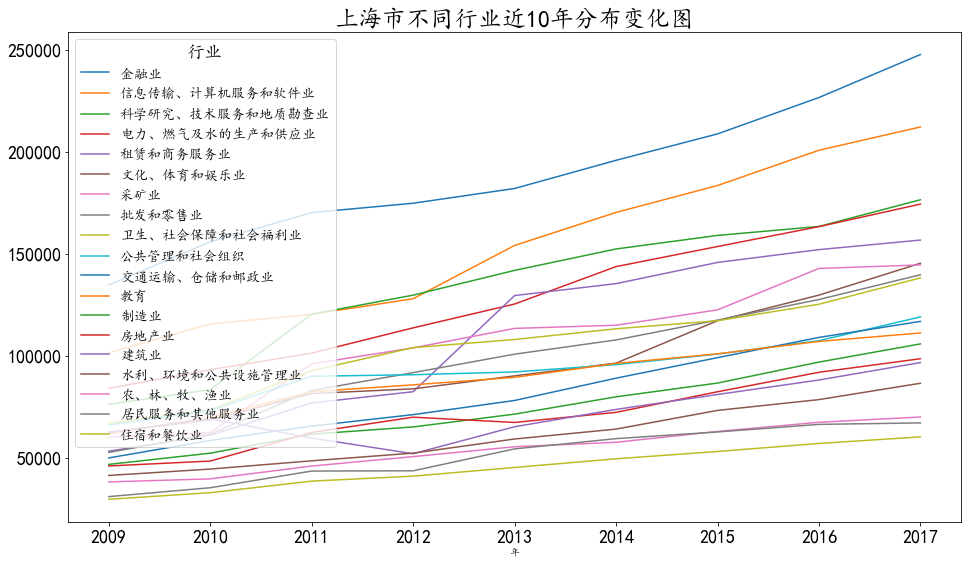

In [16]:
%matplotlib inline 
#　C-1 某省各行业近些年人均工资变化折线图

原.set_index(['地区','行业','年'])\
  .unstack()\
  .loc["上海市"]\
  .dropna(axis=1) \
  .sort_values (by=('数据', 2017), ascending=False)\
  .droplevel(None, axis=1) \
  .T \
  .plot(figsize=(16,9),title='上海市不同行业近10年分布变化图')

## C-２ 某省各行业近些年人均工资变化柱状图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D068CD588>,
      dtype=object)

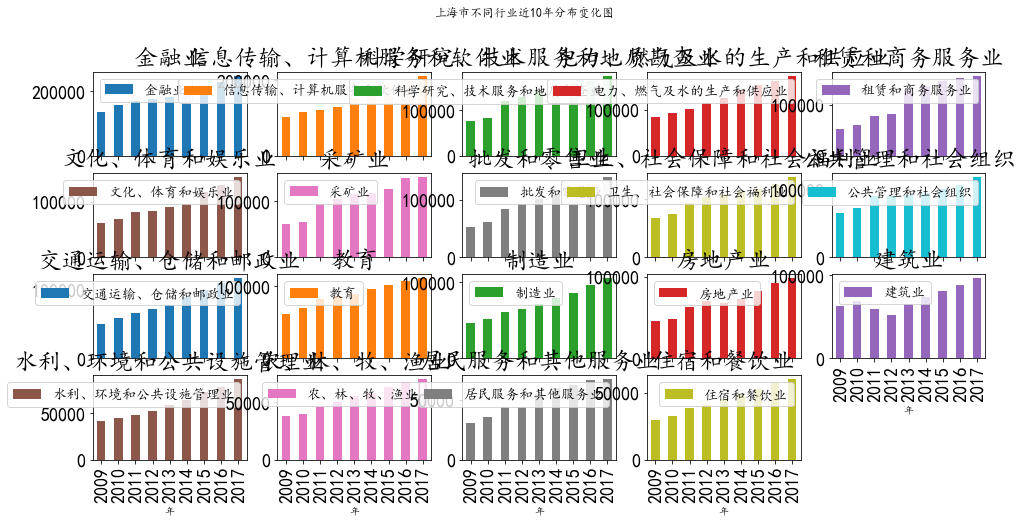

In [17]:
# C-２ 某省各行业近些年人均工资变化柱状图
原.set_index(['地区','行业','年'])\
  .unstack()\
  .loc["上海市"]\
  .dropna(axis=1) \
  .sort_values (by=('数据', 2017), ascending=False)\
  .droplevel(None, axis=1) \
  .T \
  .plot.bar(subplots=True, layout=(5,5), figsize=(16,9),title='上海市不同行业近10年分布变化图')

## C-3 某省各行业近些年人均工资变化柱状图（top3）

In [18]:
# 17年平均值排序head(3)
原.set_index(['年']).loc[2017].groupby(by="行业")\
  .mean().sort_values(by="数据", ascending=False)\
  .head(3).index

Index(['金融业', '信息传输、计算机服务和软件业', '科学研究、技术服务和地质勘查业'], dtype='object', name='行业')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D075D4B08>,
      dtype=object)

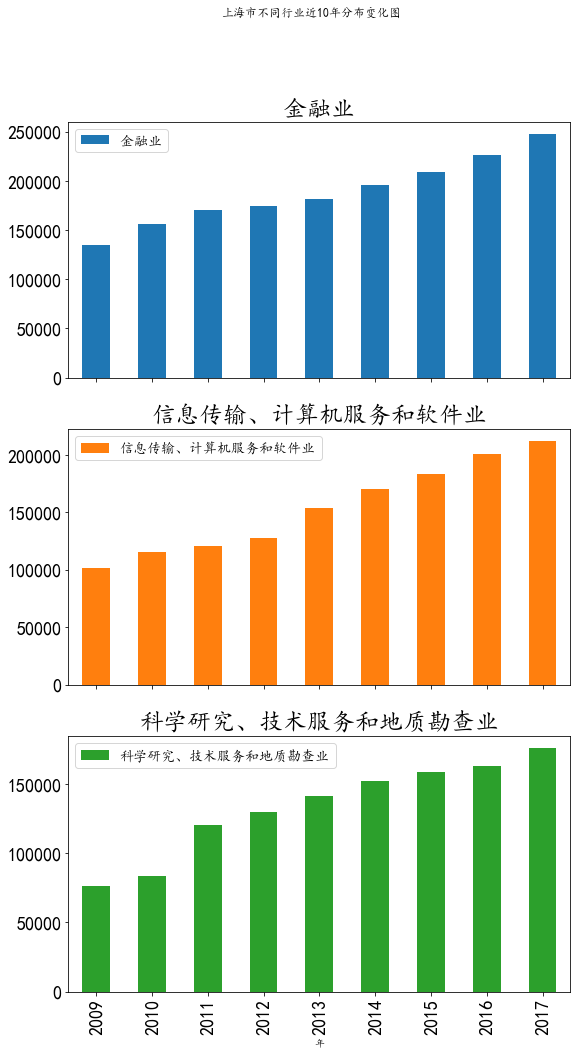

In [19]:
# C-3 某省各行业近些年人均工资变化柱状图（top3）
原.set_index(['行业'])\
  .loc[['金融业', '信息传输、计算机服务和软件业', '科学研究、技术服务和地质勘查业']]\
  .reset_index()\
  .set_index(['地区','行业','年'])\
  .unstack()\
  .loc["上海市"]\
  .dropna(axis=1) \
  .sort_values (by=('数据', 2017), ascending=False)\
  .droplevel(None, axis=1) \
  .T \
  .plot.bar(subplots=True, figsize=(9,16),title='上海市不同行业近10年分布变化图')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D0732A688>,
      dtype=object)

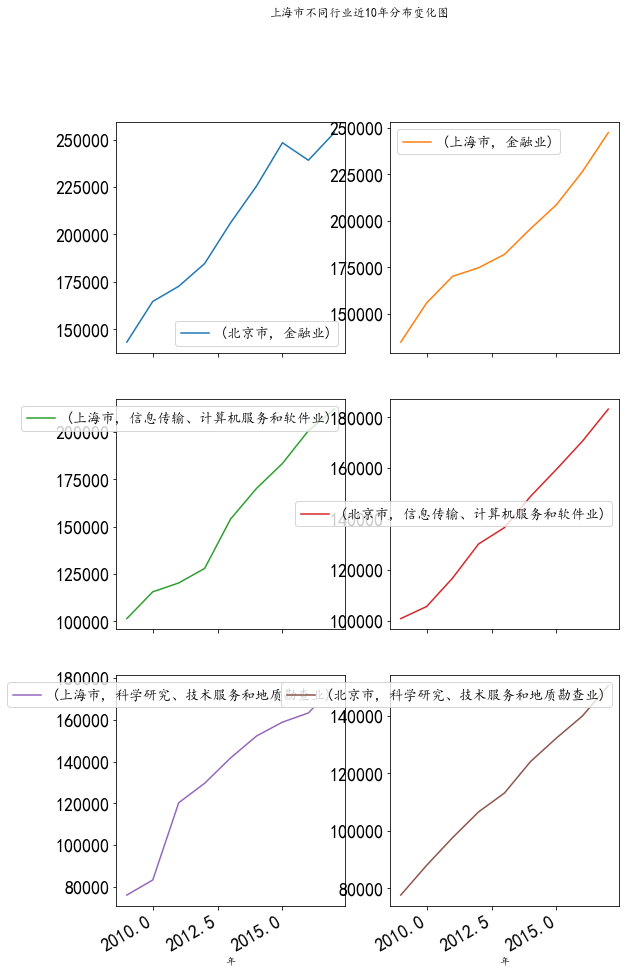

In [20]:
# C-3 某省各行业近些年人均工资变化柱状图（top3）
原.set_index(['行业'])\
  .loc[['金融业', '信息传输、计算机服务和软件业', '科学研究、技术服务和地质勘查业']]\
  .reset_index()\
  .set_index(['地区','行业','年'])\
  .unstack()\
  .loc[["北京市", "上海市"]]\
  .dropna(axis=1) \
  .sort_values (by=('数据', 2017), ascending=False)\
  .droplevel(None, axis=1) \
  .T \
  .plot(subplots=True, layout=(3,2), figsize=(9,16),title='上海市不同行业近10年分布变化图')

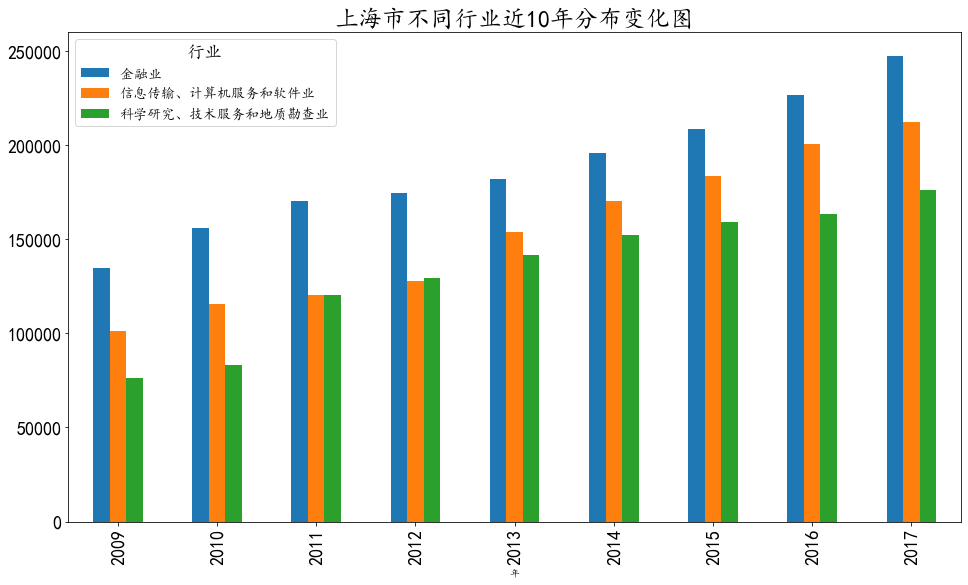

In [21]:
原.set_index(['行业'])\
  .loc[['金融业', '信息传输、计算机服务和软件业', '科学研究、技术服务和地质勘查业']]\
  .reset_index()\
  .set_index(['地区','行业','年'])\
  .unstack()\
  .loc["上海市"]\
  .dropna(axis=1) \
  .sort_values (by=('数据', 2017), ascending=False)\
  .droplevel(None, axis=1) \
  .T \
  .plot.bar(figsize=(16,9),title='上海市不同行业近10年分布变化图')

## C-4 北上广三地的比较 学生练习
* 使用loc 或 concat 合并想要对比的分组
* 请分别计算北上广的2017年各行业平均工资，选择前三个行业，并合表格，绘图


In [22]:
# C-4 北上广三地的比较



# melt

melt()函数和相应的函数DataFrame.melt() 对于将DataFrame"按摩" 成一种格式是有用的，其中一列或多列是标识符变量，而所有其他列（被视为测量变量）在行轴上“未透视”，仅留下两个非标识符列，“变量”和“值”。可以通过提供var_name和value_name参数来自定义这些列的名称。

![](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

In [23]:
两指报 = df_就业切片.drop(['指标'], axis=1)\
                   .set_index(['地区','年','行业','行业指标']).unstack()

In [24]:
两指报.columns

MultiIndex([('数据',     '人员'),
            ('数据', '人员平均工资')],
           names=[None, '行业指标'])

In [25]:
两指报平 = 两指报.droplevel(None, axis=1) \
               .reset_index() 
两指报平.地区.unique()

array(['上海市', '云南省', '内蒙古自治区', '北京市', '吉林省', '四川省', '天津市', '宁夏回族自治区',
       '安徽省', '山东省', '山西省', '广东省', '广西壮族自治区', '新疆维吾尔自治区', '江苏省', '江西省',
       '河北省', '河南省', '浙江省', '海南省', '湖北省', '湖南省', '甘肃省', '福建省', '西藏自治区',
       '贵州省', '辽宁省', '重庆市', '陕西省', '青海省', '黑龙江省'], dtype=object)

In [26]:
两指报平.melt(id_vars=['地区','年','行业'])

,地区,年,行业,行业指标,value
0,上海市,2009,交通运输、仓储及邮电通信业,人员,35.6329
1,上海市,2009,交通运输、仓储和邮政业,人员,NaN
2,上海市,2009,住宿和餐饮业,人员,10.8191
3,上海市,2009,信息传输、计算机服务和软件业,人员,6.5150
4,上海市,2009,公共管理和社会组织,人员,18.2518
...,...,...,...,...,...
13635,黑龙江省,2018,电力、燃气及水的生产和供应业,人员平均工资,NaN
13636,黑龙江省,2018,科学研究、技术服务和地质勘查业,人员平均工资,NaN
13637,黑龙江省,2018,租赁和商务服务业,人员平均工资,NaN
13638,黑龙江省,2018,采矿业,人员平均工资,NaN


In [27]:
两指报平.melt(id_vars=['地区','年','行业']).set_index(['地区','年','行业','行业指标'])

value
地区   年    行业              行业指标           
上海市  2009 交通运输、仓储及邮电通信业   人员      35.6329
          交通运输、仓储和邮政业     人员          NaN
          住宿和餐饮业          人员      10.8191
          信息传输、计算机服务和软件业  人员       6.5150
          公共管理和社会组织       人员      18.2518
...                                   ...
黑龙江省 2018 电力、燃气及水的生产和供应业  人员平均工资      NaN
          科学研究、技术服务和地质勘查业 人员平均工资      NaN
          租赁和商务服务业        人员平均工资      NaN
          采矿业             人员平均工资      NaN
          金融业             人员平均工资      NaN

[13640 rows x 1 columns]

# cufflinks

In [28]:
import cufflinks as cf

In [54]:
# C-3 某省各行业近些年人均工资变化柱状图（top3）
原.set_index(['行业'])\
  .loc[['金融业', '信息传输、计算机服务和软件业', '科学研究、技术服务和地质勘查业']]\
  .reset_index()\
  .set_index(['地区','行业','年'])\
  .unstack()\
  .loc[["北京市", "上海市", "广东省",'天津市','重庆市']]\
  .dropna(axis=1) \
  .sort_values (by=('数据', 2017), ascending=False)\
  .droplevel(None, axis=1) \
  .T \
  .iplot(subplots=True, title='上海市不同行业近10年分布变化图')

In [30]:
原

,地区,年,行业,数据
人员平均工资,,,,
5890,北京市,2018,农、林、牧、渔业,NaN
5891,北京市,2017,农、林、牧、渔业,55218.0
5892,北京市,2016,农、林、牧、渔业,51941.0
5893,北京市,2015,农、林、牧、渔业,50797.0
5894,北京市,2014,农、林、牧、渔业,49478.0
...,...,...,...,...
11775,新疆维吾尔自治区,2013,公共管理和社会组织,46636.0
11776,新疆维吾尔自治区,2012,公共管理和社会组织,45071.0
11777,新疆维吾尔自治区,2011,公共管理和社会组织,39862.0


In [31]:
历年分省均值表 = 原.dropna().groupby(["地区","行业"]).agg({"数据":"mean"})\
                  .unstack("行业")\
                  .droplevel(None, axis=1)

历年分省均值 = 历年分省均值表.stack().mean()
历年分省均值表_离差 = 历年分省均值表.applymap(lambda x: x-历年分省均值)
离差_行业 = pd.DataFrame({"离差_行业":历年分省均值表_离差.mean(axis=0).sort_values()})

#历年分省均值表_离差.mean(axis=1).sort_values()
#  
#  .iplot(kind="box")
#  .sort_values(by="数据", ascending=False)[['数据']]

In [55]:
历年分省均值

51909.876627051475

In [32]:
历年分省均值表_长 = 历年分省均值表.stack()
历年分省均值表_长_离差 = 历年分省均值表_长.apply(lambda x: x-历年分省均值)
历年分省均值表_长_离差绝对值 = 历年分省均值表_长.apply(lambda x: abs(x-历年分省均值))
区中, 业中 = 历年分省均值表_长_离差绝对值.index[历年分省均值表_长_离差绝对值.argmin()]
区中, 业中

('内蒙古自治区', '文化、体育和娱乐业')

In [33]:
区中 = 历年分省均值表.mean(axis=1).sort_values().index[15]
业中 = 历年分省均值表.mean(axis=0).sort_values().index[10]
区中, 业中

('贵州省', '公共管理和社会组织')

In [34]:
区排 = list(历年分省均值表.mean(axis=1).sort_values().index)
业排 = list(历年分省均值表.mean(axis=0).sort_values().index)
#区排

In [35]:
历年分省均值表_双排 = 历年分省均值表.loc[区排,业排]
历年分省均值表_离差_双排 = 历年分省均值表_离差.loc[区排,业排]

In [36]:
历年分省均值表_离差_双排.T.iplot(kind='heatmap')

In [37]:
历年分省均值表_离差_双排.loc[list(reversed(区排)),list(reversed(业排))].iplot(kind='box')

In [38]:
历年分省均值表_离差_双排.loc[list(reversed(区排)),list(reversed(业排))].T.iplot(kind='box')

In [45]:
ax = 历年分省均值表_离差_双排.loc[区排,list(reversed(业排))].iplot(kind='barh', legend = False)


In [40]:
历年分省均值表_离差_双排.iloc[[0,1,2,-3,-2,-1],].iplot(kind='barh', legend = False)

In [49]:
历年分省均值表_离差

行业,交通运输、仓储和邮政业,住宿和餐饮业,信息传输、计算机服务和软件业,公共管理和社会组织,农、林、牧、渔业,制造业,卫生、社会保障和社会福利业,居民服务和其他服务业,建筑业,房地产业,批发和零售业,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、燃气及水的生产和供应业,科学研究、技术服务和地质勘查业,租赁和商务服务业,采矿业,金融业
地区,,,,,,,,,,,,,,,,,,,
上海市,29908.012262,-6751.098849,102003.790040,40768.345595,2190.790040,22039.012262,52334.567817,-523.987738,19997.345595,19016.456706,46032.234484,37409.234484,45248.345595,8906.678929,76049.790040,81645.234484,58318.456706,54739.678929,136475.123373
云南省,3075.234484,-26281.098849,4937.345595,-2703.209960,-25952.098849,-12458.987738,-2865.432183,-22721.321071,-20186.209960,-14756.987738,-13231.543294,-207.765516,-7623.987738,-20030.765516,9953.678929,886.456706,-17464.654405,-13463.209960,44094.678929
内蒙古自治区,3783.456706,-21366.765516,1334.790040,2411.345595,-23201.765516,-8314.321071,2092.678929,-14326.209960,-16080.209960,-14767.876627,-13836.543294,8537.901151,-4.098849,-15624.987738,11877.234484,2066.790040,-11214.432183,9734.456706,13086.012262
北京市,19544.345595,-7706.876627,87189.012262,27335.567817,-9005.543294,21153.678929,59705.012262,-10616.098849,16948.901151,19701.234484,31599.123373,41496.678929,58815.678929,7898.567817,54948.456706,62554.678929,43021.567817,29484.567817,152278.678929
吉林省,-3835.987738,-25085.543294,-1470.987738,-11008.432183,-27696.543294,-6395.321071,-7132.654405,-23663.321071,-18223.432183,-16508.098849,-17948.098849,-4529.321071,-12187.543294,-26203.098849,-196.876627,-680.543294,-16654.432183,-6884.321071,12223.456706
四川省,3274.678929,-21228.765516,14670.345595,-119.654405,-15339.876627,-9220.432183,8042.456706,-16030.321071,-15746.432183,-7389.432183,-10526.765516,-1008.543294,-3534.209960,-18886.876627,11185.790040,22381.790040,-5450.543294,683.234484,20703.234484
天津市,24679.901151,-18598.765516,52304.901151,33394.790040,3926.456706,7802.901151,35722.123373,-20004.765516,4337.234484,22288.456706,5176.345595,34937.123373,24525.456706,11879.901151,50070.678929,53458.678929,4946.345595,31501.012262,53050.901151
宁夏回族自治区,1186.901151,-22509.987738,11941.123373,-2443.876627,-19986.098849,-9355.765516,-1838.654405,-17355.432183,-14741.321071,-11321.876627,-11612.209960,691.234484,-1152.987738,-14571.321071,25655.567817,5051.345595,-17816.209960,28198.456706,19157.790040
安徽省,-5905.098849,-24391.098849,2571.567817,-3501.987738,-26839.098849,-8595.098849,-169.987738,-16834.654405,-10486.543294,-7929.209960,-13552.321071,-3962.543294,-9309.987738,-18169.987738,14478.123373,5036.456706,-12212.321071,12058.012262,11073.012262


In [41]:
历年分省均值表_离差_双排.iloc[[0,1,2,-3,-2,-1],[0,1,2,-3,-2,-1]].iplot(kind='barh', legend = False)

In [42]:
my_fig = 历年分省均值表_离差_双排.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1],[0,1,2,-3,-2,-1]].iplot(kind='barh', asFigure=True)


In [43]:
my_fig.layout.legend.orientation.

SyntaxError: invalid syntax (<ipython-input-43-c2d63aa068e0>, line 1)

In [50]:
my_fig = 历年分省均值表_离差_双排.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1],[0,1,2,-3,-2,-1]].iplot(kind='barh', asFigure=True)
#my_fig.layout.legend
#handles, labels = my_fig.get_legend_handles_labels()
#my_fig.layout.legend(reversed(handles), reversed(labels))  # reverse both handles and labels
#my_fig.update_layout(legend_orientation="h")
my_fig.update_layout(legend_traceorder="reversed")
my_fig.iplot()

In [51]:
历年分省均值表_双排.T.iplot(kind='heatmap')

In [52]:
历年分省均值表_双排.iplot(kind='box')

In [ ]:
历年分省均值表_双排.T.iplot(kind='box')

In [ ]:
原.dropna().groupby(["地区","行业"]).agg({"数据":"mean"})\
  .unstack("行业")\
  .droplevel(None, axis=1)\
  .mean().mean()
#  .iplot(kind="box")
#  .sort_values(by="数据", ascending=False)[['数据']]